<a href="https://colab.research.google.com/github/AsifShaafi/Deep-Learning-Course-Examples/blob/main/CNN_Examples/Shaafi_VGG_CNN_CIFAR10_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing a VGG-style convolutional neural network for classifying CIFAR-10 image data.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

from keras.src.optimizers import SGD

# Check if GPU is available
if tf.test.is_gpu_available():
    device = '/GPU:0'
else:
    device = '/CPU:0'

display(device)

'/GPU:0'

In [12]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [14]:
# Convert the labels to one-hot encoding using the to_categorical() function.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [15]:
# Define the VGG model architecture
with tf.device(device):
  model = keras.Sequential(
      [
          # Convolutional layers
          layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
          layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          # Dense layers
          layers.Flatten(),
          layers.Dense(4096, activation="relu"),
          layers.Dense(4096, activation="relu"),
          layers.Dense(10, activation="softmax"),
       ]
      )

  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [16]:
# Compile the model
with tf.device(device):
  model.compile(
      optimizer=SGD(lr=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"]
      )

In [17]:
# Train the model
with tf.device(device):
  history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.1)

Epoch 1/25
704/704 [==============================] - 13s 17ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3010 - val_accuracy: 0.1418
Epoch 2/25
704/704 [==============================] - 12s 17ms/step - loss: 2.0800 - accuracy: 0.2145 - val_loss: 1.8773 - val_accuracy: 0.2710
Epoch 3/25
704/704 [==============================] - 12s 17ms/step - loss: 1.7227 - accuracy: 0.3443 - val_loss: 1.6760 - val_accuracy: 0.3834
Epoch 4/25
704/704 [==============================] - 11s 16ms/step - loss: 1.4209 - accuracy: 0.4723 - val_loss: 1.1943 - val_accuracy: 0.5654
Epoch 5/25
704/704 [==============================] - 12s 17ms/step - loss: 1.1607 - accuracy: 0.5796 - val_loss: 1.0476 - val_accuracy: 0.6318
Epoch 6/25
704/704 [==============================] - 12s 17ms/step - loss: 0.9485 - accuracy: 0.6629 - val_loss: 0.8436 - val_accuracy: 0.7092
Epoch 7/25
704/704 [==============================] - 11s 16ms/step - loss: 0.7900 - accuracy: 0.7230 - val_loss: 0.8286 - val_accuracy:

In [18]:
# Evaluate the model on the test set
with tf.device(device):
  test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.9881 - accuracy: 0.8017
Test loss: 0.9881398677825928
Test accuracy: 0.8016999959945679


313/313 [==============================] - 2s 5ms/step


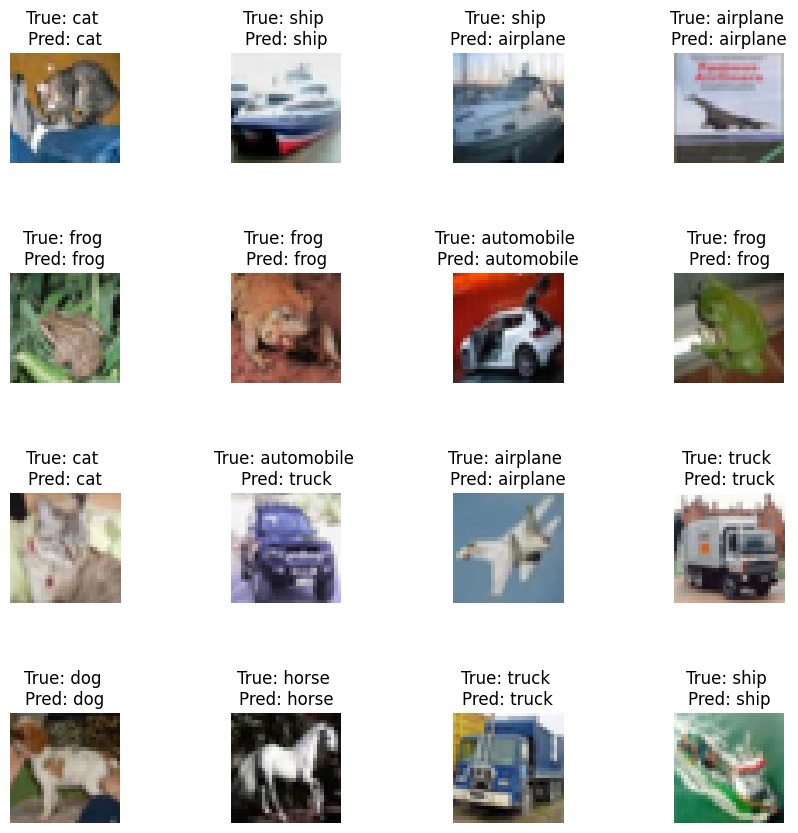

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get predicted labels for the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Define class names for CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


# Create a figure with 16 subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

# Plot images with their predicted labels
for i in range(16):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPred: %s" % (class_names[np.argmax(y_test[i])],
                                                class_names[y_pred_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()